In [29]:
# load the data frame

import pandas as pd
import numpy as np

Location = "titanic3.xlsx"
df = pd.read_excel(Location)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [30]:
df.shape

(1309, 14)

In [31]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [32]:
# Chesk for NA's and how menay per column
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [33]:
# How many fields are not NA in the age column
np.sum(df["age"].isnull()==False)

1046

In [34]:
# Sort out the average age on board of titanic, by class and gender
pd.pivot_table(df, index=["pclass","sex"], values="age", margins=True, aggfunc = np.mean)

age
pclass sex              
1      female  37.037594
       male    41.029250
2      female  27.499191
       male    30.815401
3      female  22.185307
       male    25.962273
All            29.881135

In [35]:
# Add a column for "cildren", for ages 13 oe less
df['children'] = np.where((df['age'].isnull()==False) & (df['age'] <= 13), 1, 0)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,children
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [36]:
# Count how many children, by class
pd.pivot_table(df, index=["pclass"], values="children", margins=True, aggfunc = np.sum)

,children
pclass,
1,6
2,25
3,68
All,99


In [39]:
# Found this cool way to make multidimentional querries on binned data
# These numbers for the survival rate agree with what I obtained in previous titanic homework!

age_bins = pd.cut(df['age'], [0, 18, 40, 80])
df.pivot_table('survived', ['sex', age_bins], 'pclass')

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.923077  0.952381  0.534483
       (18, 40]  0.971429  0.893939  0.451220
       (40, 80]  0.960000  0.812500  0.333333
male   (0, 18]   0.750000  0.523810  0.208333
       (18, 40]  0.406250  0.097087  0.174274
       (40, 80]  0.265823  0.058824  0.055556

In [40]:
# Find the min and max ticket prices

minfare=print(min(df["fare"]))
maxfare=print(max(df["fare"]))

0.0
512.3292


In [41]:
# Group ticket fare in bins
# (I did not find a way to split the "fare" in arbitrary bin size between min and max, 
# so I defined the bins manually)

bins=[0, 50, 100, 150,200, 250, 300, 350, 400, 450, 500, 550]

#Create names for ticket fare groups (ticket grades A - K)

group_name=['A','B','C','D','E','F','G','H','I','J','K']
df['ticket_grade']=pd.cut(df['fare'], bins, labels=group_name)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,children,ticket_grade
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,E
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,D
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,D


In [42]:
# Count number of tickets of a give grade 

ticket_count=pd.value_counts(df['ticket_grade'])
print(ticket_count)

A    1051
B     156
C      33
E      21
F      13
D      13
K       4
J       0
I       0
H       0
G       0
Name: ticket_grade, dtype: int64


In [43]:
# Find the average ticket price per ticket group/grade 

ticket_mean_price=df.groupby('ticket_grade')['fare'].mean()
ticket_mean_price

ticket_grade
A     15.731140
B     68.903981
C    124.387491
D    156.088792
E    222.388295
F    262.663462
G           NaN
H           NaN
I           NaN
J           NaN
K    512.329200
Name: fare, dtype: float64

In [44]:
# Another way to define pivot tables. 
# Sort out how many survivors per ticket group
# Test any relationship between number of survivors and ticket group 

table = df.pivot_table(index='ticket_grade',
                    aggfunc={'survived':sum, 'fare':'mean'})
print(table)

                    fare  survived
ticket_grade                      
A              15.731140       340
B              68.903981        98
C             124.387491        26
D             156.088792         8
E             222.388295        12
F             262.663462        10
G                    NaN         0
H                    NaN         0
I                    NaN         0
J                    NaN         0
K             512.329200         4


In [45]:
### Drop rows with missing data from the table

newtable = table.dropna()
newtable

,fare,survived
ticket_grade,,
A,15.731140,340
B,68.903981,98
C,124.387491,26
D,156.088792,8
E,222.388295,12
F,262.663462,10
K,512.329200,4


In [46]:
# Apply regression to check for a linear relationship

import statsmodels.formula.api as sm
result = sm.ols(formula='survived ~ fare', data=newtable).fit()
result.summary()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     2.882
Date:                Thu, 11 Oct 2018   Prob (F-statistic):              0.150
Time:                        15:38:05   Log-Likelihood:                -41.485
No. Observations:                   7   AIC:                             86.97
Df Residuals:                       5   BIC:                             86.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.6404     66.050      2.417      0.060     -10.146     329.427
fare          -0.4547      0.268     -1.698      0.150      -1.143       0.234
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.088
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.502
Skew:                           1.133   Prob(JB):                        0.472
Kurtosis:                       2.863   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Amplitude =  494.69068183341335
Decay rate =  -0.02475756835166987
Baseline =  5.310044734121063


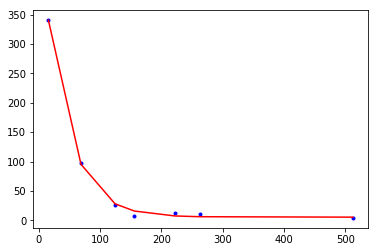

In [47]:
# The linear regression is not a good model 
# Try an exponetial decay fit, instead

import numpy as np
import scipy as sp
import pylab as pl
from scipy.optimize.minpack import curve_fit

x = newtable['fare']
y = newtable['survived']

guess_a, guess_b, guess_c = 400, -0.005, 600
guess = [guess_a, guess_b, guess_c]

exp_decay = lambda x, A, t, y0: A * np.exp(x * t) + y0

params, cov = curve_fit(exp_decay, x, y, p0=guess)

A, t, y0 = params

print ("Amplitude = ", A)
print ("Decay rate = ", t)
print ("Baseline = ", y0)

pl.clf()
best_fit = lambda x: A * np.exp(t * x) + y0

pl.plot(x, y, 'b.')
pl.plot(x, best_fit(x), 'r-')
#plt.axis([0, 520, 0, 350])
pl.show()